In [ ]:
# import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from joblib import Parallel, delayed
from math import sin, cos, pi
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image

In [ ]:
def gen_surf(frame):
    img = Image.open('frames/' + frame)
    img = img.resize((img.width // 4, img.height // 4))
    img_array = np.array(img)
    img_array = img_array / 255

    x = np.linspace(-5, 5, img_array.shape[1])
    y = np.linspace(-5, 5, img_array.shape[0])
    x, y = np.meshgrid(x, y)
    z = np.sin(x / 3)

    x_img, y_img = np.meshgrid(np.linspace(0, 1, img_array.shape[1]), np.linspace(0, 1, img_array.shape[0]))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    z = np.sin(x / 3)
    ax.plot_surface(x_img, y_img, z, facecolors=img_array, rstride=1, cstride=1, linewidth=0, antialiased=False)

    ax.view_init(elev=80, azim=90)
    # ax.dist = 40

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Surface Plot with Image Texture')

    plt.savefig(f'wframes/{t}.jpg')
    ax.clear()


img = Image.open('frames/AA.jpg')
img = img.resize((img.width // 4, img.height // 4))

# img = mpimg.imread('frames/AA.jpg')
img_array = np.array(img)
# img_array.resize((img_array.shape[0] // 4, img_array.shape[1] // 4, img_array.shape[2]))
img_array = img_array / 255

# Create data for the 3D plot
x = np.linspace(-5, 5, img_array.shape[1])
y = np.linspace(-5, 5, img_array.shape[0])
x, y = np.meshgrid(x, y)
z = np.sin(x / 3)

x_img, y_img = np.meshgrid(np.linspace(0, 1, img_array.shape[1]), np.linspace(0, 1, img_array.shape[0]))

def gen_time(t):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x0, y0 = 0.5, 0.5
    t = pi * t / 24
    xs, ys = x_img*cos(t) - y_img*sin(t) - x0*cos(t) + y0*sin(t) + x0, y_img*cos(t) + x_img*sin(t) - x0*sin(t) - y0*cos(t) + y0
    z = -1.2 * np.sqrt((xs - 0.5)**2 + (-ys + 0.85)**2) + 0.2 * 5**((-ys + 0.85) / np.sqrt((xs - 0.5)**2 + (-ys + 0.85)**2))**15
    ax.plot_surface(x_img, y_img, np.abs(z), facecolors=img_array, rstride=1, cstride=1, linewidth=0, antialiased=False)

    ax.view_init(elev=80, azim=90)
    ax.dist = 6

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # ax.set_title('3D Surface Plot with Image Texture')

    plt.savefig(f'wframes/{int(t * 24 / pi)}.jpg')
    ax.clear()


Parallel(n_jobs=-1)(delayed(gen_time)(t) for t in range(48))


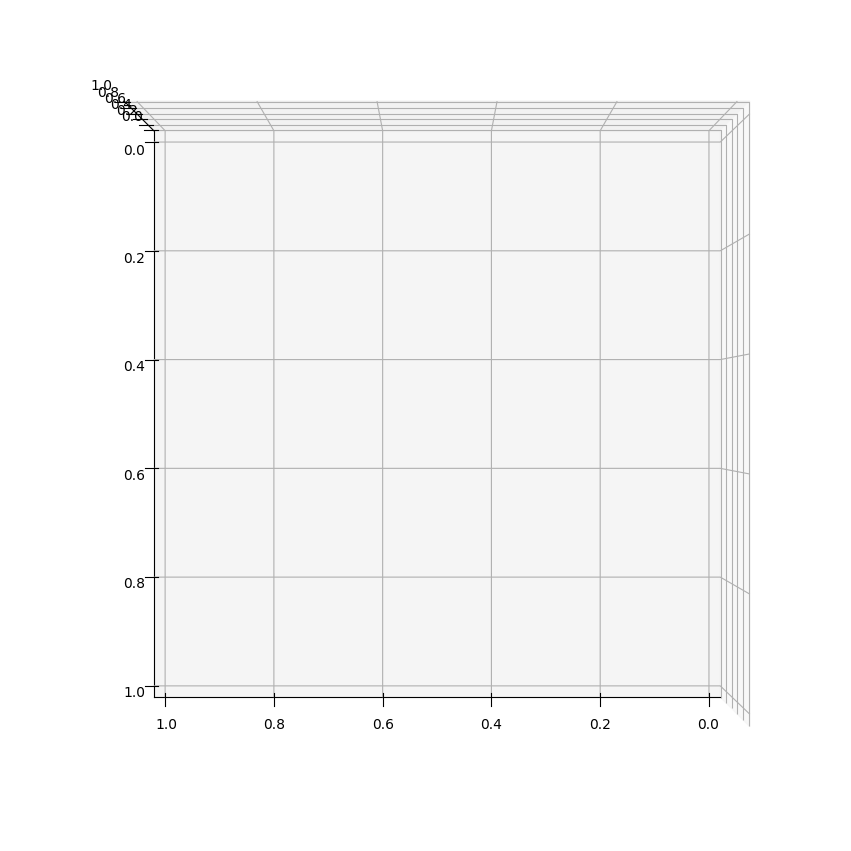

In [17]:
def gen_surface(frame):
    image = Image.open("frames/" + frame)
    image = image.resize((image.width // 4, image.height // 4))
    pixels = np.array(image)
    image = pixels.copy() / 255

    # average_colors = []
    colors_array = np.zeros(image.shape[:2])
    for y in range(image.shape[1]):
        for x in range(image.shape[0]):
            colors_array[x, y] = sum(pixels[x, y]) // image.shape[2]
            # if isinstance(pixel_color, int):
            #     average_colors.append(pixel_color)
            # else:
                # average_colors.append(sum(pixel_color) // len(pixel_color))

    # colors_array = np.array(average_colors).reshape(image.shape[0], image.shape[1])
    color_ratio = sum(1 for p in colors_array.flatten() if p >= 128) / (sum(1 for p in colors_array.flatten() if p < 128) + 0.1)

    X = np.linspace(-5, 5, image.shape[1])
    Y = np.linspace(-5, 5, image.shape[0])
    X, Y = np.meshgrid(X, Y)

    fig = plt.figure(figsize=(14.4, 10.8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=90, azim=90)
    ax.dist = 9

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if color_ratio >= 1:
        ax.plot_surface(-X, Y, 255 - colors_array, facecolors=image, rstride=1, cstride=1)
    else:
        ax.plot_surface(-X, Y, 255 - colors_array, facecolors=image, rstride=1, cstride=1)

    # plt.show()
    plt.savefig('wframes/' + frame)
    ax.clear()

gen_surface('yessuschtsch_negative.jpg')
# Parallel(n_jobs=-1)(delayed(gen_surface)(frame) for frame in os.listdir('frames')[5050:])


(90, 120, 3)


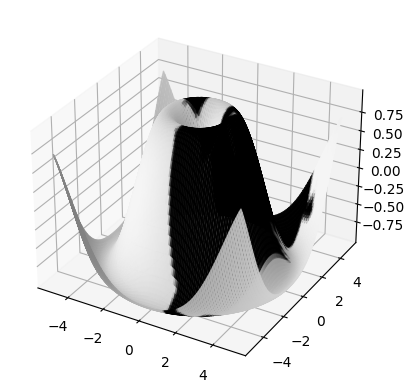

In [26]:
image = Image.open("frames/output_0267.jpg")
image = image.resize((image.width // 4, image.height // 4))

# Создание массива цветов, например, случайных цветов для каждой точки
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-6, 6, 0.25)
X = np.linspace(-5, 5, image.width)
Y = np.linspace(-5, 5, image.height)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Создание массива цветов для каждой точки поверхности
colors = np.array(image) / 255
print(colors.shape)

# Построение трехмерной поверхности с индивидуальными цветами для каждой точки
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, alpha=0.8)

plt.show()